In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# this allows plots to appear directly in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
# pip install patsy
# pip install statsmodels
import statsmodels.formula.api as smf
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

from IPython.core.display import display, HTML

In [77]:
# define url
url_30_300 = '/Users/shaokuixing/Desktop/whatever/survey30pct300msInner.csv'

# read csv file
rawData = pd.read_csv(url_0420, sep=';', thousands = '.', decimal =',')

In [78]:
rawData = rawData[rawData['avgVT/impBySec'] < rawData['avgVT/impBySec'].quantile(.85)]

In [79]:
#sns.heatmap(rawData[['optiontext','totalviewtime','avgVT/impBySec']].corr())

In [80]:

rawData['totalVTPercentile'] = pd.qcut(rawData.totalviewtime,10,labels=False)
rawData['avgVTPercentile'] = pd.qcut(rawData['avgVT/impBySec'],10,labels=False)
rawData.head(1)

,surveyid,originaladid,format,market,uid,answersetid,answerid,questionid,questiontext,optionid,optiontext,iscomplete,isrefgroup,deliveredimp,viewableimp,viewableimp_ic,totalviewtime,avgVT/impBySec,avgVT/impBySecRound,VTScaleBySec,answerDiscrete,totalVTPercentile,avgVTPercentile
0,291,36432,swipe,FI,7.018450e+18,235934,642548,86,Is the ad interesting for you?<br><span class=...,263,2,True,False,76,76,76,642844,8.46,8,6-10,Low,8,3


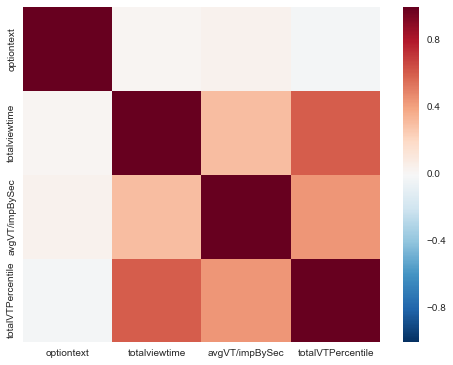

In [81]:
sns.heatmap(rawData[['optiontext','totalviewtime','avgVT/impBySec','totalVTPercentile']].corr())

In [82]:
rawData[['optiontext','totalviewtime','avgVT/impBySec','totalVTPercentile']].corr(method='pearson')

,optiontext,totalviewtime,avgVT/impBySec,totalVTPercentile
optiontext,1.000000,0.017023,0.044581,-0.019861
totalviewtime,0.017023,1.000000,0.312332,0.605106
avgVT/impBySec,0.044581,0.312332,1.000000,0.438306
totalVTPercentile,-0.019861,0.605106,0.438306,1.000000


In [83]:
rawData[['optiontext','totalviewtime','avgVT/impBySec','totalVTPercentile']].describe()

,optiontext,totalviewtime,avgVT/impBySec,totalVTPercentile
count,20649.000000,20649.000000,20649.000000,20649.000000
mean,2.346796,273385.205773,13.514837,4.499104
std,1.241195,525736.357335,9.565852,2.872435
min,1.000000,302.000000,0.300000,0.000000
25%,1.000000,27672.000000,6.150000,2.000000
50%,2.000000,94406.000000,10.880000,4.000000
75%,3.000000,299902.000000,18.610000,7.000000
max,5.000000,10621010.000000,43.290000,9.000000


In [84]:
rawData['totalVTBySec'] = rawData['totalviewtime']/1000

In [85]:
#categorical cut on avgviewtime
labels = [ "{0} - {1}".format(i, i + 5) for i in range(0, 1000, 5) ]
print labels
rawData['totalVTCategory'] = pd.cut(rawData.totalVTBySec, range(0, 1001, 5), right=False, labels=labels)
rawData[['totalVTBySec','totalVTCategory']].sample(n=20, random_state=0)
rawData['totalVTCategory_num']=pd.to_numeric(rawData.totalVTCategory.str.split('-').str[0])


['0 - 5', '5 - 10', '10 - 15', '15 - 20', '20 - 25', '25 - 30', '30 - 35', '35 - 40', '40 - 45', '45 - 50', '50 - 55', '55 - 60', '60 - 65', '65 - 70', '70 - 75', '75 - 80', '80 - 85', '85 - 90', '90 - 95', '95 - 100', '100 - 105', '105 - 110', '110 - 115', '115 - 120', '120 - 125', '125 - 130', '130 - 135', '135 - 140', '140 - 145', '145 - 150', '150 - 155', '155 - 160', '160 - 165', '165 - 170', '170 - 175', '175 - 180', '180 - 185', '185 - 190', '190 - 195', '195 - 200', '200 - 205', '205 - 210', '210 - 215', '215 - 220', '220 - 225', '225 - 230', '230 - 235', '235 - 240', '240 - 245', '245 - 250', '250 - 255', '255 - 260', '260 - 265', '265 - 270', '270 - 275', '275 - 280', '280 - 285', '285 - 290', '290 - 295', '295 - 300', '300 - 305', '305 - 310', '310 - 315', '315 - 320', '320 - 325', '325 - 330', '330 - 335', '335 - 340', '340 - 345', '345 - 350', '350 - 355', '355 - 360', '360 - 365', '365 - 370', '370 - 375', '375 - 380', '380 - 385', '385 - 390', '390 - 395', '395 - 400', '

In [86]:
rawData[['optiontext','totalviewtime','avgVT/impBySec','totalVTCategory_num']].corr(method='spearman')

,optiontext,totalviewtime,avgVT/impBySec,totalVTCategory_num
optiontext,1.000000,-0.018702,0.054044,-0.030657
totalviewtime,-0.018702,1.000000,0.512719,0.999560
avgVT/impBySec,0.054044,0.512719,1.000000,0.481333
totalVTCategory_num,-0.030657,0.999560,0.481333,1.000000


In [87]:
#categorical cut on avgviewtime
labels = [ "{0} - {1}".format(i, i + 5) for i in range(0, 200, 5) ]
print labels
rawData['avgVTCategory'] = pd.cut(rawData['avgVT/impBySec'], range(0, 201, 5), right=False, labels=labels)
rawData[['avgVT/impBySec','avgVTCategory']].sample(n=20, random_state=0)
rawData['avgVTCategory_num']=pd.to_numeric(rawData['avgVTCategory'].str.split('-').str[0])

['0 - 5', '5 - 10', '10 - 15', '15 - 20', '20 - 25', '25 - 30', '30 - 35', '35 - 40', '40 - 45', '45 - 50', '50 - 55', '55 - 60', '60 - 65', '65 - 70', '70 - 75', '75 - 80', '80 - 85', '85 - 90', '90 - 95', '95 - 100', '100 - 105', '105 - 110', '110 - 115', '115 - 120', '120 - 125', '125 - 130', '130 - 135', '135 - 140', '140 - 145', '145 - 150', '150 - 155', '155 - 160', '160 - 165', '165 - 170', '170 - 175', '175 - 180', '180 - 185', '185 - 190', '190 - 195', '195 - 200']


In [88]:
#rawData[['optiontext','totalVTBySec','avgVT/impBySec','interest_category','totalVTCategory_num','avgVTCategory_num']].corr(method='spearman')

In [89]:
rawData['interest_Category']=np.where(rawData['optiontext']>=4,'High','Low')
rawData['interest_Category_num']=np.where(rawData['optiontext']>=4,1,0)

In [90]:
from pivottablejs import pivot_ui
pivot_ui(rawData)
rawData['avgVTCategory_num2']=np.where(rawData['optiontext']>=4,'High','Low')

In [141]:
rawData[['optiontext','VTScaleBySec','viewableimp_ic','totalVTBySec','avgVT/impBySec','interest_Category_num',
         'totalVTCategory_num','avgVTCategory_num']].corr(method='pearson')

,optiontext,viewableimp_ic,totalVTBySec,avgVT/impBySec,interest_Category_num,totalVTCategory_num,avgVTCategory_num
optiontext,1.000000,-0.014834,0.017023,0.044581,0.754346,-0.030629,0.049502
viewableimp_ic,-0.014834,1.000000,0.822219,0.011714,0.002722,0.767094,0.014537
totalVTBySec,0.017023,0.822219,1.000000,0.312332,0.018769,0.999978,0.313627
avgVT/impBySec,0.044581,0.011714,0.312332,1.000000,0.024127,0.307776,0.989123
interest_Category_num,0.754346,0.002722,0.018769,0.024127,1.000000,-0.037447,0.026800
totalVTCategory_num,-0.030629,0.767094,0.999978,0.307776,-0.037447,1.000000,0.310780
avgVTCategory_num,0.049502,0.014537,0.313627,0.989123,0.026800,0.310780,1.000000


In [93]:
df1 = rawData[rawData['avgVT/impBySec'] < rawData['avgVT/impBySec'].quantile(.85)]

In [140]:
rawData[['optiontext','VTScaleBySec','totalVTBySec','avgVT/impBySec','interest_Category_num',
         'totalVTCategory_num','avgVTCategory_num']].describe()

,optiontext,totalVTBySec,avgVT/impBySec,interest_Category_num,totalVTCategory_num,avgVTCategory_num
count,20649.000000,20649.000000,20649.000000,20649.000000,19541.000000,20649.000000
mean,2.346796,273.385206,13.514837,0.177200,174.682207,10.921594
std,1.241195,525.736357,9.565852,0.381847,218.487980,9.715445
min,1.000000,0.302000,0.300000,0.000000,0.000000,0.000000
25%,1.000000,27.672000,6.150000,0.000000,20.000000,5.000000
50%,2.000000,94.406000,10.880000,0.000000,80.000000,10.000000
75%,3.000000,299.902000,18.610000,0.000000,245.000000,15.000000
max,5.000000,10621.010000,43.290000,1.000000,995.000000,40.000000


In [104]:
#pd.factorize(rawData['VTScaleBySec'])[0]

array([0, 1, 2, ..., 2, 3, 4])

In [101]:
#rawData['VTScaleBySec'].get_values()

In [109]:
# pd.Categorical(rawData.VTScaleBySec)
pd.Categorical(rawData['avgVT/impBySec'])

[8.46, 22.80, 31.22, 15.44, 15.44, ..., 6.16, 7.44, 31.10, 11.31, 2.73]
Length: 20649
Categories (3058, float64): [0.30, 0.31, 0.33, 0.34, ..., 43.22, 43.25, 43.26, 43.29]

In [111]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

#to convert into numbers

#test = encoder.fit_transform(test)

#to convert back

#test = encoder.inverse_transform(test)

In [134]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

rawData['interestCategory_num2'] = encoder.fit_transform(rawData.interest_Category)
rawData.VTScaleBySec.unique()

[6-10, 21-25, ABOVE 31, 11-15, 1-5, 16-20, <=1, 26-30]
Categories (8, object): [6-10, 21-25, ABOVE 31, 11-15, 1-5, 16-20, <=1, 26-30]

In [149]:
#rawData['test'] = pd.Categorical.from_array(rawData.interest_Category)
#rawData['test'] = pd.Categorical.from_codes(rawData.optiontext, rawData.interest_Category)
rawData['VTScaleBySec'] = rawData['VTScaleBySec'].astype('category')
rawData.VTScaleBySec.cat.reorder_categories(['<=1','1-5','6-10','11-15','16-20','21-25','26-30','ABOVE 31'])
rawData['vtscalebysec_num'] = encoder.fit_transform(rawData.VTScaleBySec)
#rawData[['VTScaleBySec','vtscalebysec_num']].sample(n=5)
rawData.drop(rawData[['vtscalebysec_num']],axis=1, inplace=True)

In [150]:

#rawData.sample(n=5,random_state=5)

In [151]:
# create function to transform age column into numerical
def vt_trans(x):
    if x['VTScaleBySec'] == "<=1":
        val = 1
    elif x['VTScaleBySec'] == "1-5":
        val = 2
    elif x['VTScaleBySec'] == "6-10":
        val = 3
    elif x['VTScaleBySec'] == "11-15":
        val = 4
    elif x['VTScaleBySec'] == "16-20":
        val = 5
    elif x['VTScaleBySec'] == "21-25":
        val = 6
    elif x['VTScaleBySec'] == "26-30":
        val = 7
    else:
        val=8
    return val

In [153]:
rawData['avgvtcatnum'] = rawData.apply(vt_trans, axis=1)

In [165]:
df2=rawData[['optiontext','avgvtcatnum','viewableimp_ic','totalVTBySec','avgVT/impBySec','interest_Category_num',
         'totalVTCategory_num','avgVTCategory_num']]
df2.corr(method='kendall')

,optiontext,avgvtcatnum,viewableimp_ic,totalVTBySec,avgVT/impBySec,interest_Category_num,totalVTCategory_num,avgVTCategory_num
optiontext,1.000000,0.050059,-0.039968,-0.013807,0.040366,0.625578,-0.022903,0.048792
avgvtcatnum,0.050059,1.000000,0.070067,0.371088,0.906317,0.027578,0.347926,0.962051
viewableimp_ic,-0.039968,0.070067,1.000000,0.726807,0.072402,-0.022347,0.711040,0.071041
totalVTBySec,-0.013807,0.371088,0.726807,1.000000,0.361353,-0.009717,0.989276,0.371300
avgVT/impBySec,0.040366,0.906317,0.072402,0.361353,1.000000,0.021349,0.335739,0.907795
interest_Category_num,0.625578,0.027578,-0.022347,-0.009717,0.021349,1.000000,-0.023515,0.026912
totalVTCategory_num,-0.022903,0.347926,0.711040,0.989276,0.335739,-0.023515,1.000000,0.349650
avgVTCategory_num,0.048792,0.962051,0.071041,0.371300,0.907795,0.026912,0.349650,1.000000


In [156]:
from pivottablejs import pivot_ui
pivot_ui(df2)

In [159]:
# pip install plotly --upgrade
# https://plot.ly/python/getting-started/
import plotly.plotly as py
import plotly.graph_objs as go
# from plotly import __version__
# from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
# init_notebook_mode() 
py.sign_in('mistertooth', '38103td8wi')

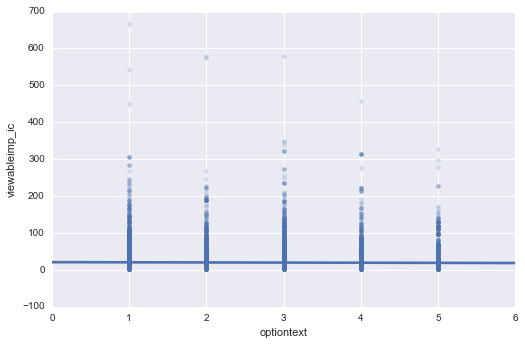

In [168]:
# create a fitted model in 1 line
sns.lmplot(x='optiontext', y='viewableimp_ic', data=df2, aspect=1.5,scatter_kws={'alpha':0.2} )
#df2.plot(kind='scatter', x='avgvtcatnum', y='interest_Category_num', alpha=0.2)

In [172]:
# change in one item effects a change in another item
df2.corr(method='spearman')

,optiontext,avgvtcatnum,viewableimp_ic,totalVTBySec,avgVT/impBySec,interest_Category_num,totalVTCategory_num,avgVTCategory_num
optiontext,1.000000,0.062066,-0.052426,-0.018702,0.054044,0.687163,-0.030657,0.060478
avgvtcatnum,0.062066,1.000000,0.096450,0.496697,0.980981,0.031195,0.464369,0.981525
viewableimp_ic,-0.052426,0.096450,1.000000,0.899025,0.107246,-0.026770,0.883629,0.098076
totalVTBySec,-0.018702,0.496697,0.899025,1.000000,0.512719,-0.011898,0.999560,0.499028
avgVT/impBySec,0.054044,0.980981,0.107246,0.512719,1.000000,0.026139,0.481333,0.981113
interest_Category_num,0.687163,0.031195,-0.026770,-0.011898,0.026139,1.000000,-0.028498,0.030487
totalVTCategory_num,-0.030657,0.464369,0.883629,0.999560,0.481333,-0.028498,1.000000,0.467436
avgVTCategory_num,0.060478,0.981525,0.098076,0.499028,0.981113,0.030487,0.467436,1.000000


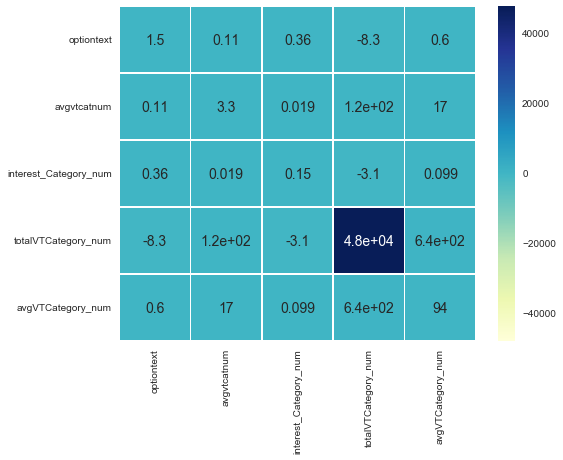

In [180]:
# Covariance measures the direction and magnitude of the relationship between two variables XX and YY.
sns.heatmap(df2[['optiontext','avgvtcatnum','interest_Category_num',
                 'totalVTCategory_num','avgVTCategory_num']].cov(), annot=True, linewidths=.5,cmap="YlGnBu")